In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [35]:
dataset= pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
dataset['price'] = load_boston().target


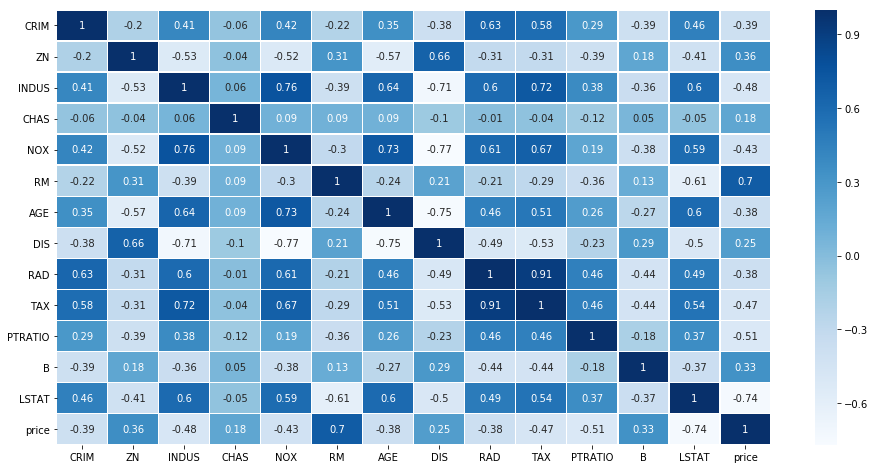

In [36]:
correlation_matrix = dataset.corr().round(2)

plt.figure(figsize = (16,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, cmap="Blues")
plt.show()

In [44]:
feature_names = abs(correlation_matrix['price'])

features = feature_names[feature_names>0.50]

features

RM         0.70
PTRATIO    0.51
LSTAT      0.74
price      1.00
Name: price, dtype: float64

In [56]:
relevant_features = ['LSTAT', 'RM']

X = dataset[relevant_features]
y = dataset['price']

In [65]:
def getting_parameter(X, y):
    ones_constructed = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.linalg.inv(np.dot(ones_constructed.T, ones_constructed))
    return np.dot(params, np.dot(ones_constructed.T, y))

In [66]:
params = getting_parameter(X,y)
params

array([-1.35827281, -0.64235833,  5.09478798])